In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [3]:
ls /content/gdrive

MyDrive/


In [4]:
cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
print('all packages are imported')

all packages are imported


In [6]:
DIR= "PetImages"
CATEGORIES=["Cat","Dog"]

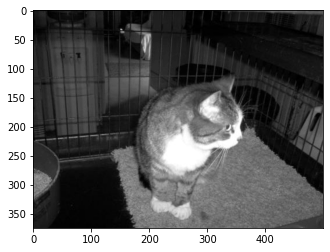

In [7]:
for category in CATEGORIES:
    path=os.path.join(DIR,category) #the path to dog or cat dir
    for im in os.listdir(path):
    
        img_array=cv2.imread(os.path.join(path,im),cv2.IMREAD_GRAYSCALE) #RGB size is 3* sizes of the grayscale
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

(80, 80)


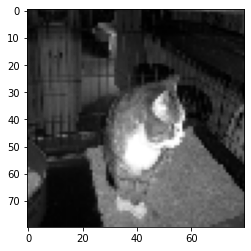

In [8]:
#Data normalization
IMG_SIZE=80
new_image=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
print(new_image.shape)
plt.imshow(new_image,cmap='gray')
plt.show()

In [9]:
##### *******************  prepare the training dataset ********************
training_data=[]
 
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DIR,category)  
        num_category=CATEGORIES.index(category) # 0 for cat and 1 for dog
        for im in os.listdir(path):
            
            try:
                img_array=cv2.imread(os.path.join(path,im),cv2.IMREAD_GRAYSCALE)  
                training_data.append([new_image,num_category])
               
               
      
            except Exception as e:        
                pass

                    
create_training_data()  
print(len(training_data))     

19409


In [10]:
#we will shuffle the data
import random
random.shuffle(training_data)

In [11]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [12]:
#reshaping an array : we can add or remove dimensions or change number of elements in each dimension.
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1 : depend on how many features do we have,1 for grayscale
y=np.array(y).reshape((-1,1))

In [13]:
#save data
import pickle

pickle_out = open("X.pkl","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pkl","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [14]:
import tensorflow as tf 
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Conv2D,Dropout,MaxPooling2D

In [15]:
X = pickle.load(open("X.pkl","rb"))
y = pickle.load(open("y.pkl","rb"))

X = X/255.0  

In [25]:
#building the model (CNN)
model=tf.keras.models.Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:])) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.25)) 

model.add(Conv2D(64,(3,3)))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu')) 
 
#The output layer contains a single neuron in order to make predictions. It uses the sigmoid activation function in order to produce a probability output in the range of 0 to 1 that can easily and automatically be converted to pets class values.
#Binary Classification: One node, sigmoid activation.
#where values over 0.5 should belong to class 1 else class 0. 
model.add(Dense(1,activation='sigmoid')) 
          
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 78, 78, 64)        640       
                                                                 
 activation_2 (Activation)   (None, 78, 78, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 39, 39, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 64)        36928     
                                                                 
 activation_3 (Activation)   (None, 37, 37, 64)        0         
                                                      

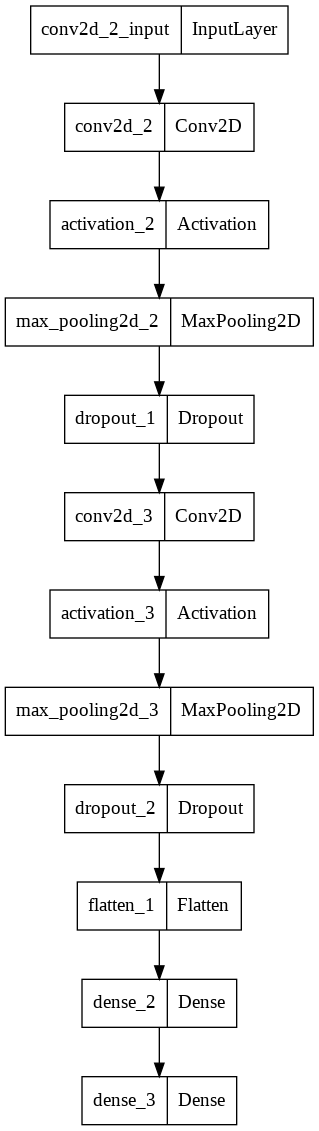

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model,'chart.png')

In [27]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])   

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , y, test_size=0.2)


In [30]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
122/122 [==============================] - 222s 2s/step - loss: 0.6927 - accuracy: 0.5444 - val_loss: 0.6608 - val_accuracy: 0.5907
Epoch 2/10
122/122 [==============================] - 219s 2s/step - loss: 0.6312 - accuracy: 0.6424 - val_loss: 0.5978 - val_accuracy: 0.6757
Epoch 3/10
122/122 [==============================] - 218s 2s/step - loss: 0.5754 - accuracy: 0.6967 - val_loss: 0.5576 - val_accuracy: 0.7184
Epoch 4/10
122/122 [==============================] - 217s 2s/step - loss: 0.5368 - accuracy: 0.7309 - val_loss: 0.5261 - val_accuracy: 0.7403
Epoch 5/10
122/122 [==============================] - 217s 2s/step - loss: 0.4963 - accuracy: 0.7594 - val_loss: 0.5542 - val_accuracy: 0.7141
Epoch 6/10
122/122 [==============================] - 216s 2s/step - loss: 0.4683 - accuracy: 0.7767 - val_loss: 0.4651 - val_accuracy: 0.7798
Epoch 7/10
122/122 [==============================] - 218s 2s/step - loss: 0.4386 - accuracy: 0.7942 - val_loss: 0.4571 - val_accuracy: 0.7834

[]

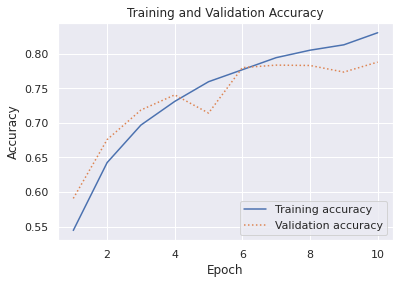

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()


Text(89.18, 0.5, 'Actual label')

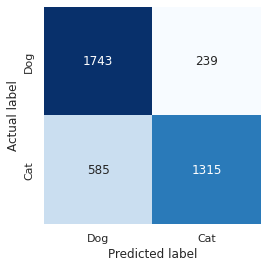

In [32]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test) 
cma = confusion_matrix(y_test, y_pred.round())
labels = ['Dog', 'Cat']
sns.heatmap(cma, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')


In [33]:
def test(image):
    img_size=80
    img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size))
    return new_array.reshape(-1,img_size,img_size,1)

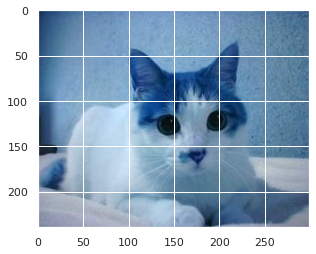

In [36]:
image=cv2.imread('cat.jpg')
plt.imshow(image)
plt.show()

In [39]:
image=r'cat.jpg'
CATEGORIES=["Cat","Dog"]

In [40]:
prediction=model.predict([test(image)/255.0])
print(prediction)
print((prediction[0][0]).round())
print(CATEGORIES[int((prediction[0][0]).round())])

[[0.07042417]]
0.0
Cat


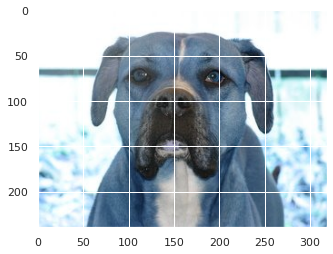

In [41]:
image=cv2.imread('dog.jpg')
plt.imshow(image)
plt.show()

In [42]:
image=r'dog.jpg'
prediction=model.predict([test(image)/255.0])
print(prediction)
print((prediction[0][0]).round())
print(CATEGORIES[int((prediction[0][0]).round())])


[[0.9664]]
1.0
Dog
